In [1]:
%matplotlib widget

In [1]:
from dask.distributed import Client, LocalCluster
import numpy as np
import time

cluster = LocalCluster()
client = Client(cluster) # Same as client=Client()

In [4]:
def load(x):
    time.sleep(0.2)
    return np.arange(10000) + x

def process(x,y):
    return 2*x + y

def save(x):
    time.sleep(0.2)
    return 'Saved'

In [6]:
inputs_1, inputs_2 = np.arange(0,50), np.arange(50,100)
futures = []

for i,j in zip(inputs_1,inputs_2):
    x = client.submit(load, i) #client.submit(fucn, *args)
    y = client.submit(load, j)
    p = client.submit(process, x,y)
    z = client.submit(save, p)
    futures.append(z)
z

<Future: pending, key: save-29b8cb01cbf44b2f506fafba875977bf>

In [7]:
z

<Future: finished, type: str, key: save-29b8cb01cbf44b2f506fafba875977bf>

In [8]:
#result = [future.result() for future in futures]
results = client.gather(futures) ### faster

In [9]:
results

['Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved',
 'Saved']

In [8]:
data = np.arange(0,6,1)

In [9]:
from dask import delayed
@delayed
def inc(x):
    return x + 1
@delayed
def custom_op(x):
    return 2*x**2
@delayed
def add(x, y):
    return x + y

In [10]:
@delayed
def plot(a,b,savefile=None):
    fig,ax = plt.subplots(figsize=(5,2) )
    ax.scatter(a,b, marker='o', facecolor='0.8', edgecolor='0.2')
    ax.set_xlabel(r'$x+1$')
    ax.set_ylabel(r'$2x^{2}$')
    ax.spines[['right','top']].set_visible(False)
    fig.tight_layout()
    if savefile != None:
        fig.savefig(savefile,transparent=True)
        return
    return fig

In [11]:
def compute_single(data, show=False, savefile=None):
    
    stored =[]
    a = [inc(x) for x in data]
    b = [custom_op(x) for x in data]
    output = [add(i, j) for i,j in zip(a,b)]
    stored.append(delayed(sum)(output))
    if not show:
        return stored
    stored.append( plot(a,b,savefile) )
    return stored
        

In [12]:
stored = compute_single(data=np.arange(0,6,1), 
                        show=True, savefile=None)
stored

[Delayed('sum-046f216b-da24-415a-a55a-3a965721de5c'),
 Delayed('plot-b957f290-ed7b-4dc5-8dc8-d94b176f649d')]

2023-06-16 05:32:17,765 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53203', name: 3, status: running, memory: 16, processing: 0>
2023-06-16 05:32:17,977 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53209', name: 2, status: running, memory: 12, processing: 0>
2023-06-16 05:32:17,997 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:53203'.
2023-06-16 05:32:17,997 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:53209'.
2023-06-16 05:32:22,604 - distributed.nanny - WARNING - Restarting worker
2023-06-16 05:32:22,716 - distributed.nanny - WARNING - Restarting worker
2023-06-16 14:07:11,929 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:53206', name: 0, status: running, 

[131, <Figure size 500x200 with 1 Axes>]

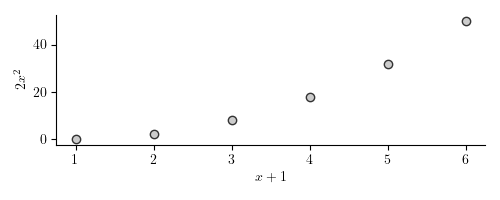

In [17]:
future = client.compute(stored)
results = client.gather(future);
results

In [10]:
client.close()
cluster.close()